# CARTopiaX Simulation Plots

## Overview

After running the CARTopiaX simulation, a file is generated at `./output/final_data.csv`. You can run this notebook to analyze the therapy results with 5 main plots showing tumor-CART cell dynamics over time.

The shown example corresponds to a 30-day simulation of a tumor with an initial tumor radius of 150.0 micrometers. The treatment protocol administers two equal CAR-T cell doses on days 0 and 8; each dose contains the same number of CAR-T cells as the initial tumor cell count, representing a dual-dose therapy strategy.


## Requirements

This notebook requires the following Python libraries:

- **pandas** >= 1.3.0
- **matplotlib** >= 3.5.0
- **numpy** >= 1.21.0
- **os** - Built-in Python module (no installation required)

### Installation

You can install the required packages using pip:

```bash
pip install pandas>=1.3.0 matplotlib>=3.5.0 numpy>=1.21.0
```

Or using conda:

```bash
conda install pandas matplotlib numpy
```

## 1. Library Imports and Data Loading

First, we import the necessary libraries and load the simulation data for analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

csv_data_dir = './output/'
csv_file_path = os.path.join(csv_data_dir, 'final_data.csv')
if os.path.exists(csv_file_path):
    df_csv = pd.read_csv(csv_file_path)
    print(f"Loaded {csv_file_path}")
    print(f"Data covers {df_csv['total_days'].min():.1f} to {df_csv['total_days'].max():.1f} days")
else:
    print(f"Error: {csv_file_path} not found")
    exit()

time_points = df_csv['total_days'].values

Loaded ./output/final_data.csv
Data covers 0.0 to 30.0 days


## 2. Plot 1: Tumor & Alive CART Cells Over Time

Shows the number of tumor cells (red) and alive CART cells (green) over time.

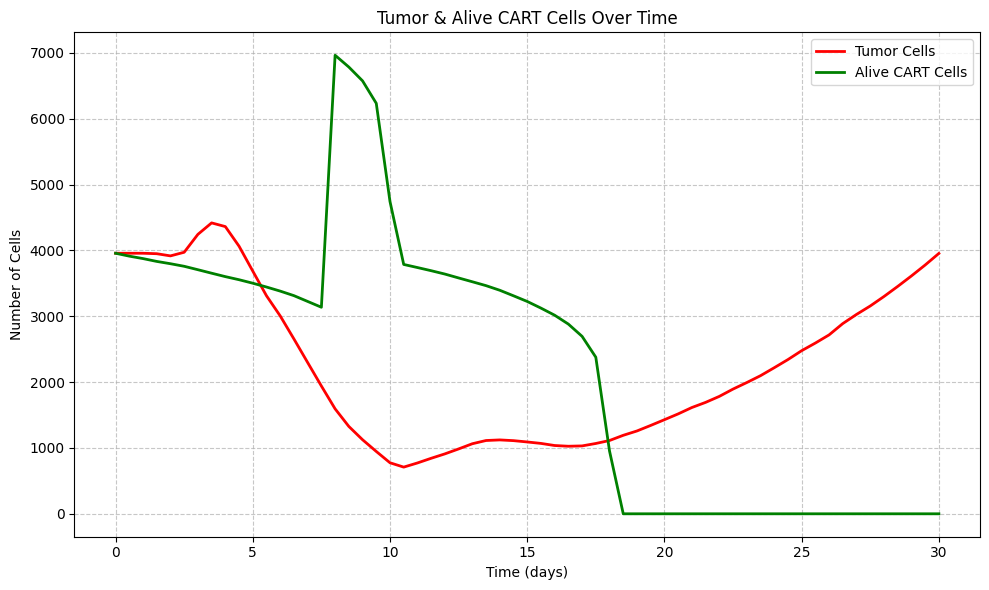

In [2]:
# Plot 1: Tumor & Alive CART Cells Over Time
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Number of Cells')

# Plot tumor cells
ax1.plot(time_points, df_csv['num_tumor_cells'], 
         color='red', linestyle='-', linewidth=2, label='Tumor Cells')

# Plot alive CART cells
ax1.plot(time_points, df_csv['num_alive_cart'], 
         color='green', linestyle='-', linewidth=2, label='Alive CART Cells')

ax1.legend(loc='best')
ax1.grid(True, linestyle='--', alpha=0.7)
plt.title('Tumor & Alive CART Cells Over Time')
plt.tight_layout()
plt.show()

## 3. Plot 2: Absolute Numbers of Tumor Cell Types

Shows the absolute count of 5 tumor cell types:
- **Type 1** (Dark Red): Most Proliferative Tumor Cells
- **Type 2** (Red): Very Ploliferative Tumor Cells
- **Type 3** (Orange): Less Ploriferative Tumor Cells
- **Type 4** (Yellow): Least Ploriferative Tumor Cells
- **Type 5** (Blue): Dead

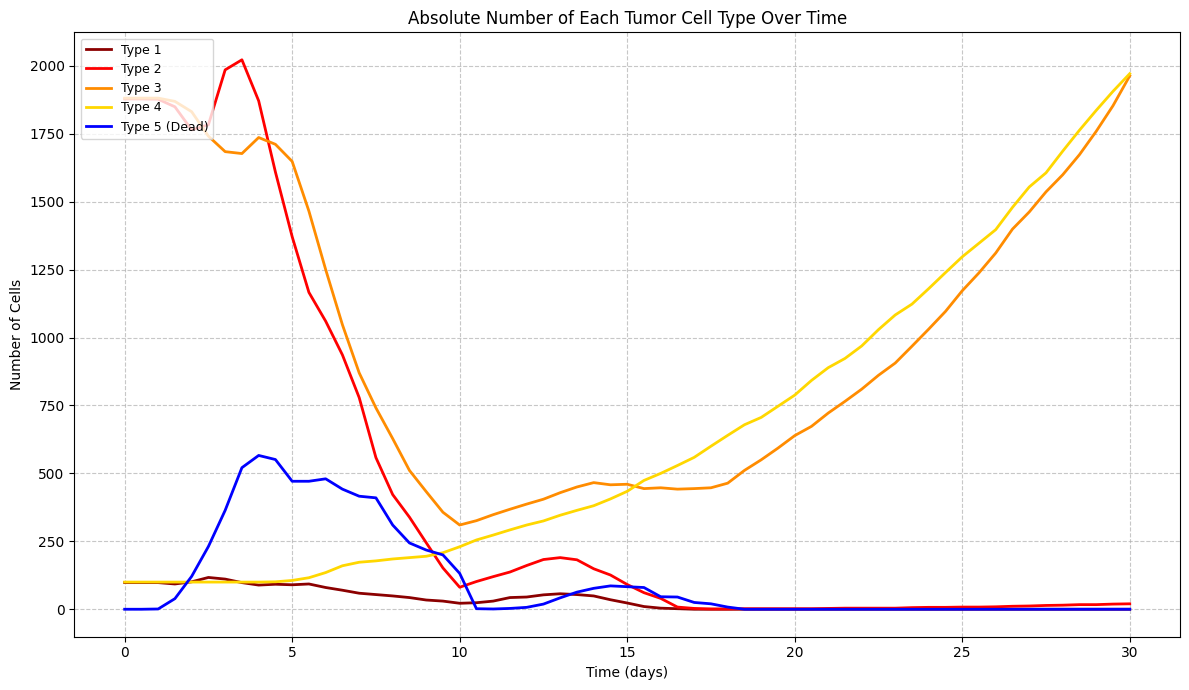

In [3]:
# Plot 2: Absolute number of each cell type
cell_types = [
    ('tumor_cells_type1', 'Type 1'),
    ('tumor_cells_type2', 'Type 2'),
    ('tumor_cells_type3', 'Type 3'),
    ('tumor_cells_type4', 'Type 4'),
    ('tumor_cells_type5_dead', 'Type 5 (Dead)')
]

colors = ['#8B0000', '#FF0000', '#FF8C00', '#FFD700', '#0000FF']

fig, ax_abs = plt.subplots(figsize=(12, 7))
for idx, (col, label) in enumerate(cell_types):
    if col in df_csv.columns:
        ax_abs.plot(time_points, df_csv[col], 
                   color=colors[idx], linestyle='-', linewidth=2, label=f'{label}')

ax_abs.set_xlabel('Time (days)')
ax_abs.set_ylabel('Number of Cells')
ax_abs.set_title('Absolute Number of Each Tumor Cell Type Over Time')
ax_abs.legend(loc='upper left', fontsize=9)
ax_abs.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4. Plot 3: Percentage Distribution of Tumor Cell Types

Shows the percentage composition of each tumor cell type relative to the total tumor population.

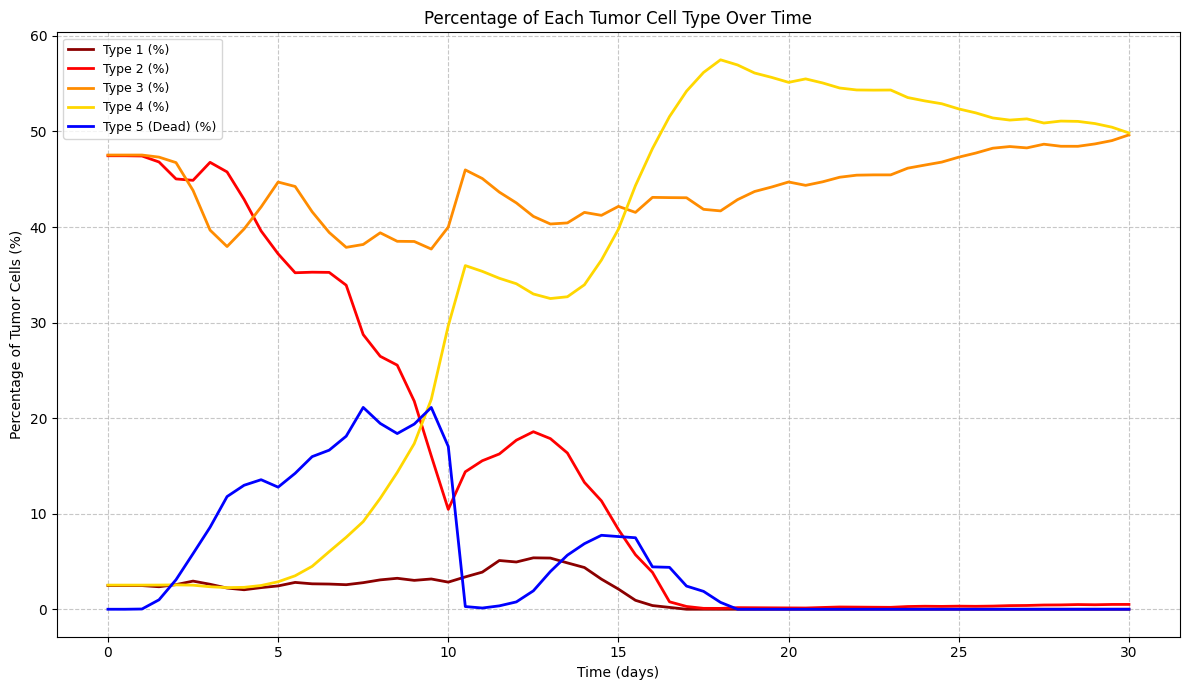

In [4]:
# Plot 3: Percentage of each cell type
fig, ax_pct = plt.subplots(figsize=(12, 7))
for idx, (col, label) in enumerate(cell_types):
    if col in df_csv.columns:
        percentage = 100 * df_csv[col] / df_csv['num_tumor_cells']
        ax_pct.plot(time_points, percentage, 
                   color=colors[idx], linestyle='-', linewidth=2, label=f'{label} (%)')

ax_pct.set_xlabel('Time (days)')
ax_pct.set_ylabel('Percentage of Tumor Cells (%)')
ax_pct.set_title('Percentage of Each Tumor Cell Type Over Time')
ax_pct.legend(loc='upper left', fontsize=9)
ax_pct.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 5. Plot 4: Oncoprotein and Oxygen Levels

Shows average oncoprotein levels (red, left axis) and average oxygen levels (blue, right axis) in cancer cells over time.

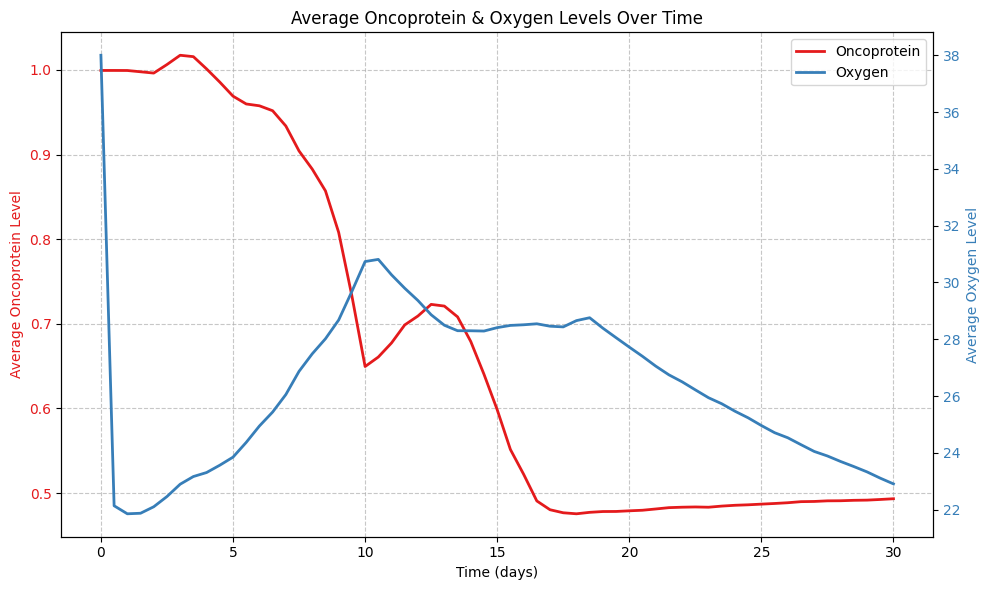

In [5]:
# Plot 4: Oncoprotein and Oxygen levels
fig, ax_onco = plt.subplots(figsize=(10, 6))
ax_oxy = ax_onco.twinx()  # Secondary y-axis

# Oncoprotein (left y-axis)
if 'average_oncoprotein' in df_csv.columns:
    ax_onco.plot(time_points, df_csv['average_oncoprotein'], 
                color='#e41a1c', linestyle='-', linewidth=2, label='Oncoprotein')

# Oxygen (right y-axis)
if 'average_oxygen_cancer_cells' in df_csv.columns:
    ax_oxy.plot(time_points, df_csv['average_oxygen_cancer_cells'], 
               color='#377eb8', linestyle='-', linewidth=2, label='Oxygen')

ax_onco.set_xlabel('Time (days)')
ax_onco.set_ylabel('Average Oncoprotein Level', color='#e41a1c')
ax_oxy.set_ylabel('Average Oxygen Level', color='#377eb8')
ax_onco.tick_params(axis='y', labelcolor='#e41a1c')
ax_oxy.tick_params(axis='y', labelcolor='#377eb8')
ax_onco.set_title('Average Oncoprotein & Oxygen Levels Over Time')

lines_onco, labels_onco = ax_onco.get_legend_handles_labels()
lines_oxy, labels_oxy = ax_oxy.get_legend_handles_labels()
ax_onco.legend(lines_onco + lines_oxy, labels_onco + labels_oxy, loc='best')

ax_onco.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 6. Plot 5: Tumor Cells and Tumor Radius Over Time

Shows tumor cell count (red, left axis) and tumor radius in micrometers (purple, right axis) over time.

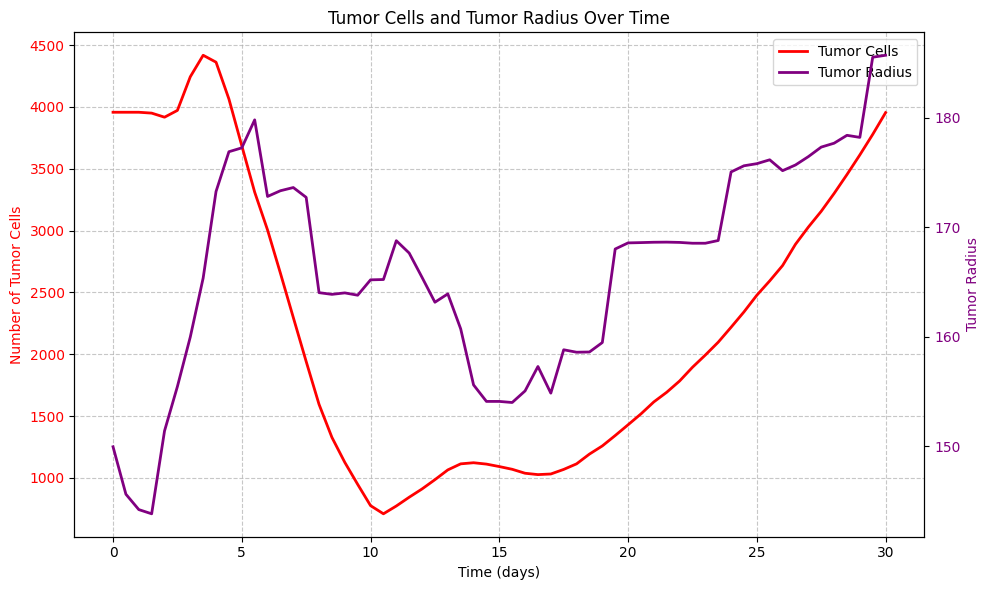

In [6]:
# Plot 5: Tumor Cells and Tumor Radius Over Time
fig, ax_cells = plt.subplots(figsize=(10, 6))
ax_radius = ax_cells.twinx()  # Secondary y-axis for radius

# Number of tumor cells (left y-axis)
ax_cells.plot(time_points, df_csv['num_tumor_cells'], 
              color='red', linestyle='-', linewidth=2, label='Tumor Cells')

# Tumor radius (right y-axis)
if 'tumor_radius' in df_csv.columns:
    ax_radius.plot(time_points, df_csv['tumor_radius'], 
                  color='purple', linestyle='-', linewidth=2, label='Tumor Radius')

ax_cells.set_xlabel('Time (days)')
ax_cells.set_ylabel('Number of Tumor Cells', color='red')
ax_radius.set_ylabel('Tumor Radius', color='purple')
ax_cells.tick_params(axis='y', labelcolor='red')
ax_radius.tick_params(axis='y', labelcolor='purple')
ax_cells.set_title('Tumor Cells and Tumor Radius Over Time')

lines_cells, labels_cells = ax_cells.get_legend_handles_labels()
lines_radius, labels_radius = ax_radius.get_legend_handles_labels()
ax_cells.legend(lines_cells + lines_radius, labels_cells + labels_radius, loc='best')

ax_cells.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()